# Eric Schulman
# Homework 1 - Math 387c

# Question 1
## Part A


The absolute error is given by $| x - \hat{x}|  = .04$.

The relative error is $| x-\hat{x}|/\hat{x}  = .04/3.14 = 0.01$.

There are 2 significant digits.

## Part B

$\hat{z} = 5(\hat{x} - 3\hat{y})$

$\hat{z} = 5((x\pm \delta_1) - 3(y \pm \delta_2))$

$\hat{z} = 5(x-3y) \pm 5(\delta_1 - 3\delta_2)$

As a result, the absolute error is $5(.04 + 3 \times .01) = 0.35$

and the relative error is $ \left| \dfrac{ 5(.04 + 3 \times .01) }{5(3.14 - 3\times1.23)} \right| = .12 $

Again, 2 significant digits

# Question 2

$A^T = ((I+B)(I-B)^{-1})^T$

$A^T = ((I-B)^{-1})^T(I+B)^T$

$A^T = ((I-B^T))^{-1}(I+B^T)$

$A^T = (I+B^{-1})(I+B^T)$

$A^T = I + B^{-1} + B^T + B^{-1} B^T$

$A^T = I + B^{-1} + B^T - I$

$A^T = I + B^{-1} + B^T + B^T B^{-1}$

$A^T = (I + B^T)(I+B)^{-1}$

$A^T = ((I-B)^{-1})^{-1}(I+B)^{-1}$

$A^T = A^{-1}$

# Question 3

$K_{\infty}(A) = || A ||_{\infty} ||A^{-1}||_{\infty}$

$|| A ||_{\infty} = \text{max}_j \sum_{i=1}^n | a_{ij} | = \text{max}(1 + |a|, 2)$

$|| A^{-1} ||_{\infty} = \text{max}_j \sum_{i=1}^n | a_{ij} | = \text{max}\left(\left|\dfrac{1}{1-a} \right| + \left| \dfrac{a}{1-a} \right|, 2\left|\dfrac{1}{1-a} \right|\right) = \left|\dfrac{1}{1-a} \right| \text{max}(1+|a|,2)$ 

So, assuming $a\neq 0$,

$K_{\infty}(A) = \left|\dfrac{1}{1-a} \right| \left( \text{max}(1 + |a|, 2) \right)^2$

# Question 4


## Part A

We know that it for a given column $j$

$$ \text{max}_{i} |a_{ij}| \leq  \sum_i |a_{ij}|$$

Since, this holds for any given column, we can bound by the maximum column

$$ \text{max}_i |a_{ij}| \leq \text{max}_{j} \sum_i |a_{ij}|$$

Since, the LHS of the inequality above could apply to any given column we technically have $n$ inequalities. Summing over columns $j$ we get,

$$ \sum_j \text{max}_i |a_{ij}| \leq  n \text{max}_{j} \sum_i |a_{ij}|$$

From Jensen's inequality we know that 

$$ \text{max}_i \sum_j  |a_{ij}| \leq  \sum_j \text{max}_i |a_{ij}|$$
 
 As a result, 
 
$$ \text{max}_i \sum_j  |a_{ij}| \leq  n \text{max}_{j} \sum_i |a_{ij}|$$


$$  || A ||_1 \leq n || A ||_{\infty}$$


So,

$$  || A ||_1  || A^{-1} ||_1 \leq n^2 || A ||_{\infty} || A^{-1} ||_{\infty}$$

$$  K( A)_1  \leq n^2 K_{\infty}(A) $$

$$  \dfrac{1}{n^2} K_1( A)  \leq K_{\infty}(A) $$


To show the other size of the inequality we can flip the indexes. Our argument will be briefer because the argument is completely symmetric. We can just switch $i$ and $j$ above.

$$ \text{max}_j |a_{ij}| \leq  \sum_j |a_{ij}|$$

As a result, 

$$ \sum_i \text{max}_j |a_{ij}| \leq n \text{max}_{i} \sum_j |a_{ij}|$$

So, it follows that 

$$ || A ||_{\infty} \leq n  || A ||_1 $$

And,

$$   K(A)_{\infty} \leq {n^2} K_1( A) $$

## Part B

$$K(AB) = ||AB ||\hspace{1ex} ||(AB)^{-1}||$$

Additionally,

$$||AB || \leq ||A|| \hspace{1ex}||B||$$

And 

$$||(AB)^{-1}|| = || B^{-1}A^{-1} ||  \leq ||B^{-1}|| \hspace{1ex} ||A^{-1} || $$

Combining the two equations above

 $$||AB|| \hspace{1ex} ||(AB)^{-1}|| \leq ||B^{-1}|| \hspace{1ex} ||A^{-1} || \hspace{1ex} ||A|| \hspace{1ex} ||B||$$

As a result, 

 $$K(AB) \leq K(A)K(B)$$

# Question 5

The Cholesky decomposition breaks a symmetric positive definite matrix into the product of a lower triangular matrix and its transpose.

## Square root

The algorithm involves taking a square root. We assume that a square root takes $k$ floating point operations. In practice it seems to require five or six. It is computed with the following Newton step: 

$$x_{n+1} = x_n - \dfrac{f(x_n)}{f'(x_n)} = \dfrac{1}{2}\left( x_n + \dfrac{S}{x_n} \right)$$

Where $S$ is the number we are taking the square root of i.e. $\sqrt{S}$. In practice it seems to require five or six netwon steps. We use the following algorithm to find the cholesky decomposition of a positive definite matrix $\mathbf{A}$.


## The algorithm

For each row $i$ in the matrix

1) Define 


$\mathbf{A}^{i} = \begin{pmatrix}
\mathbf{I}_{i-1} & 0              & 0 \\
0                & a_{i,i}        & \mathbf{b}_{i}^{T} \\
0                & \mathbf{b}_{i} & \mathbf{B}^{(i)}
\end{pmatrix}$

On step 1, $\mathbf{A}^{(1)} = \mathbf{A}$. On further steps,  $\mathbf{B}^{(i)}$ is a submatrix with all the entries of $\mathbf{A}^{i-1}$ except the entries in row $i$ through row 1, and column $i$ through column 1. $\mathbf{b}_{i}$ is the entries in row $i$ except the first $a_{ii}$. $\mathbf{b}_{i}^{T}$ is its transpose since this is a positive definite matrix.

2) Next compute the following matrix $\mathbf{L}_{i}$

$\mathbf{L}_{i}:=
\begin{pmatrix}
\mathbf{I}_{i-1} & 0                                  & 0 \\
0                & \sqrt{a_{i,i}}           & 0 \\
0                & \frac{1}{\sqrt{a_{i,i}}} \mathbf{b}_{i} & \mathbf{I}_{n-i}
\end{pmatrix}$

Additionally, compute $\mathbf{A}^{(i+1)}$

$\mathbf{A}^{(i+1)}=
\begin{pmatrix}
\mathbf{I}_{i-1} & 0 & 0 \\
0                & 1 & 0 \\
0                & 0 & \mathbf{B}^{(i)} - \frac{1}{a_{i,i}} \mathbf{b}_{i} \mathbf{b}_{i}^{T}
\end{pmatrix}$



3) At each step save $\mathbf{L}_i$. At the end we can compute $\mathbf{L} := \mathbf{L}_{1} \mathbf{L}_{2} \dots \mathbf{L}_{n}$


## Number of floating point operations

Computing $\mathbf{L}_i$ involves $k$ floating point operations for $\sqrt{a_{i,i}}$. In addition to that we incur $n - i$, floating point operations to compute $\frac{1}{\sqrt{a_{i,i}}} \mathbf{b}_{i}$. 

Computing $\mathbf{A}^{(i+1)}$ requires calculating $\frac{1}{a_{i,i}} \mathbf{b}_{i} \mathbf{b}_{i}^{T}$ which incurs $ (n-i) \times (n -i)$ floating point operation for the vector multiplication (although it may be possible to use the symmetry to reduce that amount). It also requires an additional $n-i$ division operiations for $(n-i)^2 +(n-i)$ operations. The subtraction will take $(n -i) \times (n-i)$ floating point operations as well.

By computing $\mathbf{L}_i$  $\mathbf{A}^{(i+1)}$ we can write $\mathbf{A}^{(i)} = \mathbf{L}_{i} \mathbf{A}^{(i+1)} \mathbf{L}_{i}^{T}$ 

In total we are incurring $k + n-i + (n-i)^2 + n-i + (n-i)^2 = k + 2(n-i) + 2(n-i)^2$ on each step.

In the final step, we compute $n$ matrix multiplications for $n\times n$ matrixes. It incurs $n^3$ floating point operations.

Summing over all $n$ steps we get

$n^3 + \sum_{i=1}^n k + 2(n-i) + 2(n-i)^2 = n^3 + nk +  2/3 n (n^2 - 1)$

# Question 6

## Analytical solution

First we solve the problem analytically. In this case, the solution to the second order differential equation is given below

$$- u_{xx}(x) + u(x) = 1$$

Is,

$$u(x) = c_1 e^x + c_2 e^(-x) + 1$$

Using the initial conditions $u(0) =0$ and $u(1) =0 $ we get that

$c_1 + c_2 = 0$ and $c_1 e + c_2 e^{-1} = 0$

Solving we get that $c_1 = -1/(1 + e)$ and  $c_2 = -e/(1 + e)$


## Discretizing

We could set the differential equation up as a system of $J$ equations. This would involve discreting the unit interval into $J$ steps of distance $h$ so that $h = \Delta x$.

Here we have that $u_{xx} = \dfrac{ \frac{\Delta u}{\Delta x} - \frac{\Delta u}{\Delta x} }{\Delta x }$

As a result, $u_{xx} = (u_{j-1} - 2u_j +u_{j+1})/h^2$, plugging into our original differential equation and letting $h= \dfrac{1}{J} $ we get that for interval $J$

$-u_{j-1}/h^2 + (2/h^2 + 1) u_j -u_{j+1}/h^2 = 1$

And, $u_1 = 0$ and $u_j = 0$

Now, we can set up $Ax = b$ and solve it where

$A = \begin{pmatrix} -1/h^2 & 1+2/h^2 & 0 & 0 &  ... \\
-1/h^2 & 1+2/h^2 & -1/h^2 & 0 & ... \\
0& -1/h^2 & 1+2/h^2 & -1/h^2 & ... \\
... \\
... & 0 & 0 &-1/h^2 & 1+2/h^2
\end{pmatrix}$  $b = \begin{pmatrix} 0 \\ 1 \\ ... \\ 1 \\ 0 \end{pmatrix}$


## Gaussian elimination

Next we implemented a Gaussian elmination routine to solve the system of equations for $J=20$ and $h=1$, we test against the native julia implementation and get the same result.

In [13]:
#load dependencies
using Pkg
#Pkg.add("PyPlot")
using PyPlot
using LinearAlgebra

In [6]:
function gaussian_elim(A,b)
    
    A = float(hcat(A, b))
    
    #get the upper triangular matrix
    for i= 1:size(A,1)
        A_top = A[1:i-1,:]
        A_row = A[i,:]
        A_bot = A[i+1:size(A,1),:]

        for j=1:size(A_bot,1)
            A_bot_row = A_bot[j,:]
            multiply = A_bot_row[i]/A_row[i]
            A_bot[j,:] = A_bot_row - A_row*multiply
        end
        
        A[1:i-1,:] = A_top
        A[i,:] = A_row
        A[i+1:size(A,1),:] = A_bot
    end
    
    #simplify the matrix by plugging in
    for i= 1:size(A,1)
        
        i = size(A,1)-i +1 #start at the bottom, now we here
        
        A_top = A[1:i-1,:]
        A_row = A[i,:]
        A_bot = A[i+1:size(A,1),:]
        
        for j=1:size(A_top,1)
            A_top_row = A_top[j,:]
            multiply = A_top_row[i]/A_row[i]
            A_top[j,:] = A_top_row - A_row*multiply
        end

        A[1:i-1,:] = A_top
        A[i,:] = A_row
        A[i+1:size(A,1),:] = A_bot
    end
    
    #normalize rows to 1
    for i= 1:size(A,1)
        A[i,:] = 1/A[i,i]*A[i,:]
    end
    
    return(A[:,1:size(A,2)-1], A[:,size(A,2)])
    
end

gaussian_elim (generic function with 1 method)

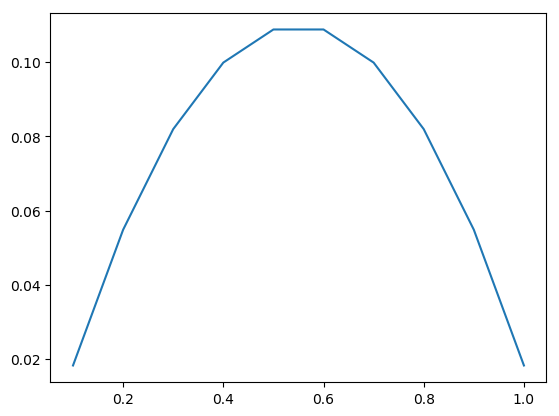

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ffb537f8d30>

In [10]:
#discretize by J
J = 10
h = 1.0/J

#initialize the solution
b = ones( (J,1))
b[1,1] = 0
b[J,1] = 0

A = zeros((J,J))

#initialize the equations
A[1,1] = 3.0
A[1,2] = -1.0

A[J,J-1] = -1.0
A[J,J] = 3.0


for i= 2:(J-1)
    A[i,i-1] = -1.0/h^2 
    A[i,i] = 1.0 + 2/h^2 
    A[i,i+1] = -1.0/h^2 
end

#compute x axis
xs = (1.0/J)*collect(1:J)
ys = gaussian_elim(A,b)[2]

plot( xs ,  ys )

## Jacobi iterations

Next we solve the system of equations with jacobi iterations. For iteration $i$ we calculate the solution vector. We decomopse $A$ into it's diagonal $D$ and the rest of the matrix $R = A - D$ and calculate


$$x_i = D^{-1}(b - R x_{i-1})$$

In [11]:
function jacobi(A,b,iter)
    A = float(A)
    
    D = Diagonal(A)
    R = A - D
    D_inv = inv(D)
    
    sol = b
    
    for i = 1:iter
        sol = D_inv*(b- R*sol)
    end 

    return sol
end 


jacobi (generic function with 1 method)

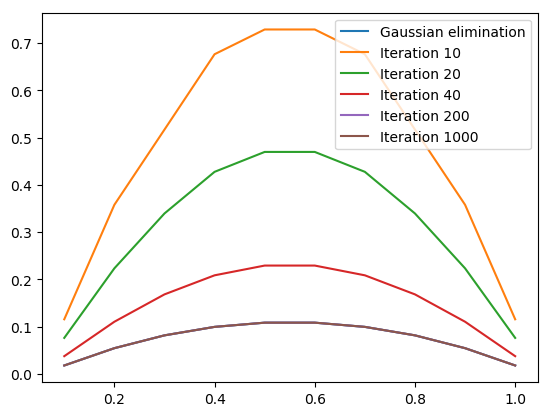

In [12]:
#plot the solution
plot( xs ,  ys, label="Gaussian elimination")

all_sols = zeros((J,J))

#plot the iterations
for i = 1:5
    iter = [10;20;40;200;1000][i]
    sol = jacobi(A,b,iter)
    plot( xs , sol , label= "Iteration $(iter)")
    all_sols[:,i] = sol 
end

plt.legend()
plt.show()